<!-- dom:TITLE: Solution to exercises, cable equation -->
# Solving the cable equation
<!-- dom:AUTHOR: Joakim Sundnes/Molly Maleckar -->
<!-- Author: -->  
**Molly Maleckar**

Date: **June 18th, 2025**

## The bistable equation (1)
The simplest model of active conduction in neuron is obtained by choosing the reaction term

$$
f(V)=AV(1-V)(V-\alpha),
$$

where $\alpha$ is a parameter between 0 and 1, and $A$ is a scaling parameter
for the reaction term.

## The bistable equation (2)
We have

$$
\frac{\partial V}{\partial t} = \frac{\partial^2 V}{\partial x^2} +AV(1-V)(V-\alpha),
$$

and if we neglect the diffusion term we get
$$
\frac{\partial V}{\partial t} = AV(1-V)(V -\alpha).
$$
The right hand side has three zeros; $V = 0,V = 1,V = \alpha$. These are
equilibrium points for the equation ($\partial V/\partial t = 0$).m

## The bistable equation (3)

<!-- dom:FIGURE: [./figs/cubic.png, width=300 frac=0.7] -->
<!-- begin figure -->

<p></p>
<img src="./figs/cubic.png" width=300>

<!-- end figure -->


Here $\alpha = 0.5$. What happens if the solution is perturbed away from the
three equilibrium points $V = 0, V = 1, V = \alpha$? (Recall that $dV/dt = f(V)$)

## The bistable equation (4)
* The equation has one unstable and two stable equilibrium points

* Any initial condition $V < \alpha$ will approach $V = 0$

* Any initial condition $V > \alpha$ will approach $V = 1$



In 1D (with diffusion), the solution is a traveling front.

## Part 1: The bistable equation

We want to solve the bistable equation on an interval $\Omega =[0,L]$:

$$
\begin{alignat*}{2}
v_t &= kv_{xx} + f(v) & \mbox{ for } & t> 0, 0 < x < L, \\
v_x &= 0 & \mbox{ for } &x = 0, x = L, \\
v & = v_0 &\mbox{ for } &t = 0, 0 < x = < L/10, \\
v & = 0 &\mbox{ for } &t = 0, L/10< x = < L,
\end{alignat*}
$$

with

$$
f(v) = Av(1-v)(v-\alpha) 
$$
and parameter values
$$
\begin{alignat*}{2}
k &= 1.0, A &= 1.0, \alpha &= 0.1 \\
L &= 100, v_0&= 0.3. &
\end{alignat*}
$$

(Note that we have used the compact notation $v_t = \partial
v/\partial t, v_{xx} = \partial^2v/\partial x^2$.)

# (Very brief) Introduction to Finite Difference Methods

## What are Finite Difference Methods?

Finite difference methods are numerical techniques used to approximate solutions to differential equations by replacing continuous derivatives with discrete approximations. These methods form the foundation of computational mathematics and are essential tools for solving partial differential equations (PDEs) that arise in physics, engineering, and many other scientific disciplines.

The core principle behind finite difference methods lies in the discretization of both the spatial domain and temporal domain. Instead of working with continuous functions, we approximate the solution at discrete grid points, transforming the differential equation into a system of algebraic equations that can be solved computationally.


# Discretization Process

The discretization process involves two key steps:

1. **Spatial Discretization**: The continuous spatial domain is divided into a finite number of grid points separated by spacing $\Delta x$
2. **Temporal Discretization**: Time is advanced in discrete steps of size $\Delta t$


# Discretization Process


![Grid Discretization](./figs/grid_discretization.png)

At each grid point $(x_i, t_n)$, we approximate the solution $u(x_i, t_n) \approx u_i^n$, where:
- $i$ represents the spatial index
- $n$ represents the temporal index
- $x_i = i \cdot \Delta x$ for $i = 0, 1, 2, ..., N_x$
- $t_n = n \cdot \Delta t$ for $n = 0, 1, 2, ..., N_t$


## Derivative Approximations

The fundamental concept in finite difference methods is the approximation of derivatives using Taylor series expansions. For a function $f(x)$, we can approximate its derivatives using neighboring grid points:

### First Derivative Approximations

**Forward Difference:**
$$\frac{df}{dx} \bigg|_{x_i} \approx \frac{f_{i+1} - f_i}{\Delta x} + O(\Delta x)$$

**Backward Difference:**
$$\frac{df}{dx} \bigg|_{x_i} \approx \frac{f_i - f_{i-1}}{\Delta x} + O(\Delta x)$$

**Central Difference:**
$$\frac{df}{dx} \bigg|_{x_i} \approx \frac{f_{i+1} - f_{i-1}}{2\Delta x} + O((\Delta x)^2)$$

### Second Derivative Approximation

**Central Difference for Second Derivative:**
$$\frac{d^2f}{dx^2} \bigg|_{x_i} \approx \frac{f_{i+1} - 2f_i + f_{i-1}}{(\Delta x)^2} + O((\Delta x)^2)$$

![Finite Difference Stencils](./figs/finite_difference_stencils.png)


## Truncation Error and Accuracy

The accuracy of finite difference approximations is characterized by their truncation error, which represents the difference between the exact derivative and its finite difference approximation. The order of accuracy is determined by the leading term in the Taylor series expansion that is truncated.

Central difference schemes generally provide higher accuracy (second-order) compared to forward or backward differences (first-order) for the same grid spacing, making them preferred for spatial derivatives in most applications.

## Applications and Significance

Finite difference methods are widely used in:
- Heat transfer and diffusion problems
- Fluid dynamics and computational fluid dynamics (CFD)
- Structural mechanics and elasticity
- Financial modeling (Black-Scholes equation)
- Image processing and computer graphics
- Weather prediction and climate modeling

The choice of finite difference scheme significantly impacts the stability, accuracy, and computational efficiency of the numerical solution, making it crucial to understand the underlying mathematical principles and their practical implications.


# Explicit Update Schemes

## Definition and Characteristics

An explicit update scheme is a time-stepping method where the solution at the next time level $(n+1)$ is calculated directly from known values at the current time level $(n)$ and previous time levels. In explicit schemes, each unknown value can be computed independently without solving a system of coupled equations.

The general form of an explicit scheme for a time-dependent PDE can be written as:

$$u_i^{n+1} = F(u_{i-p}^n, u_{i-p+1}^n, ..., u_{i+q}^n)$$

where $F$ is an explicit function of known values, and the stencil extends from $i-p$ to $i+q$ in space.

## Mathematical Framework

Consider a general time-dependent PDE of the form:

$$\frac{\partial u}{\partial t} = L[u]$$

where $L[u]$ is a spatial differential operator. The explicit finite difference discretization becomes:

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} = L_h[u_i^n]$$

Rearranging to solve for the unknown $u_i^{n+1}$:

$$u_i^{n+1} = u_i^n + \Delta t \cdot L_h[u_i^n]$$

This formulation clearly shows that $u_i^{n+1}$ depends only on known values at time level $n$.

## Explicit vs Implicit Schemes

The fundamental difference between explicit and implicit schemes lies in how they handle the temporal discretization:

Implicit systems are more costly, but are more effective in handling sharp gradients, multi-scale applications, and are more stable.

![Explicit vs Implicit Comparison](./figs/explicit_implicit_comparison.png)

### Explicit Scheme Characteristics:
- **Computational Simplicity**: Each grid point can be updated independently
- **Memory Efficiency**: Only requires storage of current time level
- **Parallelization**: Naturally parallel across spatial grid points


## Now back to...Part 1: The bistable equation

We want to solve the bistable equation on an interval $\Omega =[0,L]$:

$$
\begin{alignat*}{2}
v_t &= kv_{xx} + f(v) & \mbox{ for } & t> 0, 0 < x < L, \\
v_x &= 0 & \mbox{ for } &x = 0, x = L, \\
v & = v_0 &\mbox{ for } &t = 0, 0 < x = < L/10, \\
v & = 0 &\mbox{ for } &t = 0, L/10< x = < L,
\end{alignat*}
$$

with

$$
f(v) = Av(1-v)(v-\alpha) 
$$
and parameter values
$$
\begin{alignat*}{2}
k &= 1.0, A &= 1.0, \alpha &= 0.1 \\
L &= 100, v_0&= 0.3. &
\end{alignat*}
$$

(Note that we have used the compact notation $v_t = \partial
v/\partial t, v_{xx} = \partial^2v/\partial x^2$.)

### Explicit update scheme for the bistable equation
A standard finite difference approximation in space and time gives an explicit update formula for $v$:
$$
\begin{align*}
v_0^{j+1} &= v_0^j +\frac{k \Delta t}{\Delta x^2} 2 (v_1^j-v_0^j)
+\Delta t f(v_0^j) \\
v_i^{j+1}  &= v_i^j +\frac{k \Delta t}{\Delta x^2} (v_{i-1}^j-2v_i^j+v_{i+1}^j)
+\Delta t f(v_i^j), i = 1, \cdots, N-1 \\
v_N^{j+1} &= v_N^j +\frac{k \Delta t}{\Delta x^2} 2 (v_{N-1}^j-v_N^j)
+\Delta t f(v_N^j)
\end{align*}
$$

We will now implement this scheme in Python. First, we need to set some parameters and define arrays to store the solution:

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

k = 2.0
A = 1.0
alpha = 0.1
L =100

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N+1)
v_prev = v
left =  int(N/10)
v_prev[:left] = 0.3
print(left)
print(v[:left])
print(v[left])
print(v)

10
[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
0.0
[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


### *Exercise 1: Bistable equation in Python*
Update the code below to implement the explicit update scheme above, and solve the bistable equation. 

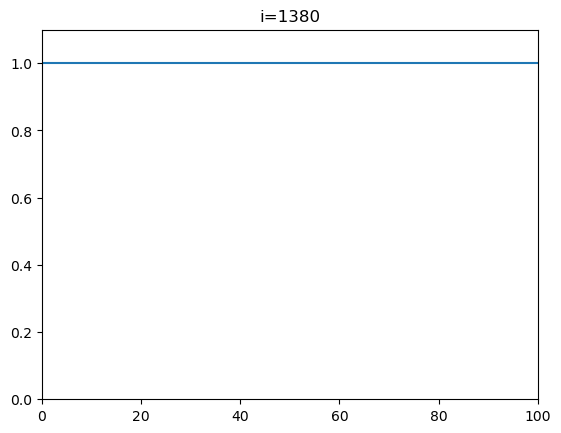

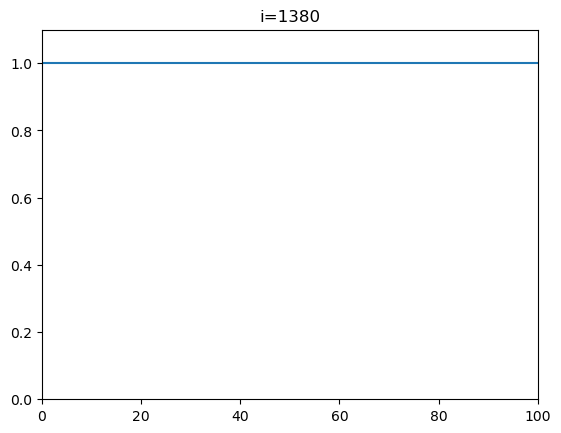

In [22]:
def f(v):
    return A*v*(1-v)*(v-alpha)


for i in range (1400):
    for j in range(1,N):
        v[j] = v_prev[j] + ((k*dt)/(dx**2))*(v_prev[j-1] - 2*v_prev[j] + v_prev[j+1]) + dt*f(v_prev[j])
     
    #add formulas for end points:
    v[0] = v_prev[0] + ((k*dt)/(dx**2))*2*(v_prev[1] - v_prev[0]) + dt*f(v_prev[0])
    v[N] = v_prev[N] + ((k*dt)/(dx**2))*2*(v_prev[N-1] - v_prev[N]) + dt*f(v_prev[N])
    v_prev = v
    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

### *Solution:*

Click below to expand the cell and see the solution. 

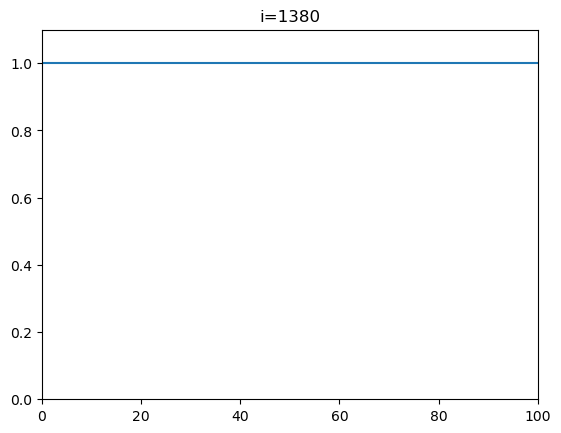

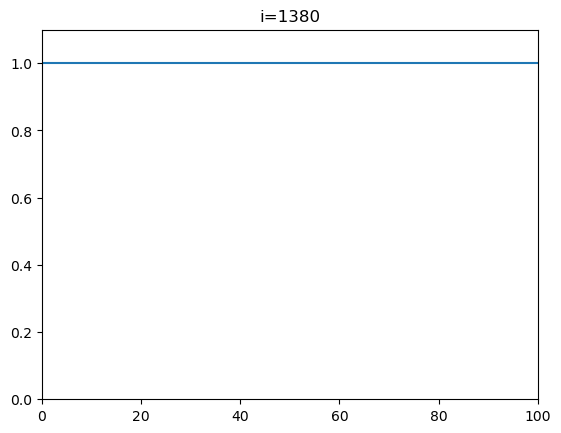

In [24]:
for i in range (1400):
    for j in range(1,N):
        I_ion = f(v_prev[j])  #reaction term
        diff = (k / dx**2) * (v_prev[j + 1]-2 * v_prev[j] + v_prev[j - 1]) #diffusion term
        v[j]  = v_prev[j] + dt * diff + dt * I_ion
    
    v[0] = v_prev[0] + dt * (k / dx ** 2) * 2 * (v_prev[1] - v_prev[0]) + dt * f(v_prev[0]) 
    v[N] = v_prev[N] + dt * (k / dx ** 2) * 2 * (v_prev[N-1] - v_prev[N]) + dt * f(v_prev[N]) 
    v_prev = v
    
    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

### Comments on the code
* Note that the solution is not saved, but overwritten for every step.

* Loops in Python are slow. It is possible to speed up the code by using vectorized NumPy operations to
  avoid the loop over the spatial domain. 

### *Exercise 2: vectorization (optional)*
Complete the code below to use a vectorized operation to update $v$, i.e., no loop over the spatial domain. 

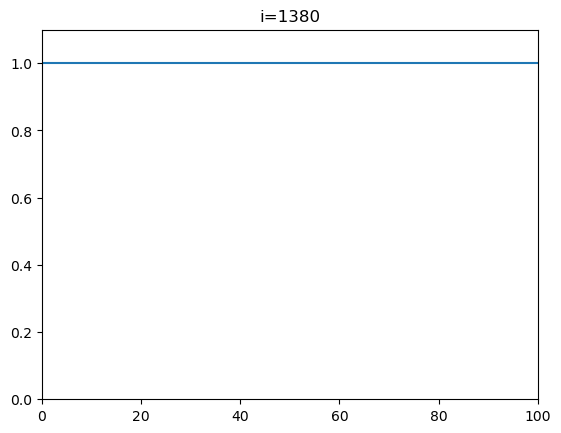

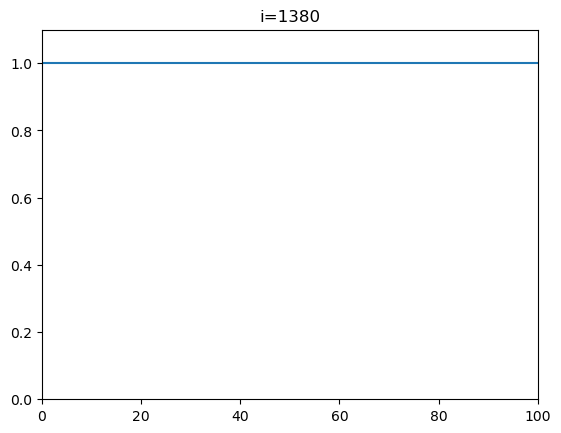

In [28]:

#reset v to initial condition:
v[:left] = 0.3
v[left:] = 0

#introduce the appropriate arrays for slicing:
I = np.arange(1,N)
Ip = I+1
Im = I-1

for i in range (1400):
    I_ion = f(v) 
    #first add diffusion terms:
    v[I] = v[I] + dt * (k / dx ** 2) * (v[Ip] - 2 * v[I] + v[Im])
    v[0] = v[0] + dt * (k / dx ** 2) * 2 * (v[1] - v[0]) 
    v[N] = v[N] + dt * (k / dx ** 2) * 2 * (v[N-1] - v[N])  
    
    #then the reaction:
    v = v + dt * I_ion
    
    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())
    

### *Solution:*

Click below to expand the cell and see the solution. 

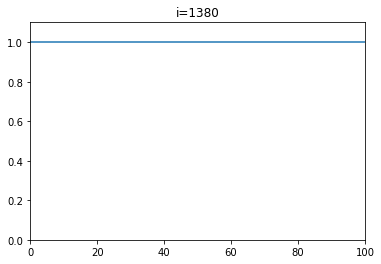

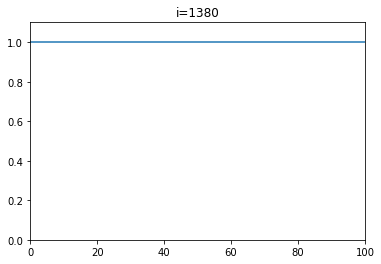

In [25]:
k = 2.0
A = 1.0
alpha = 0.1
L = 100

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N+1)
left =  int(N/10)
v[:left] = 0.3

#introduce the appropriate arrays for slicing:
I = np.arange(1,N)
Ip = I+1
Im = I-1

for i in range (1400):
    I_ion = f(v) 
    #first add diffusion terms:
    v[I] = v[I] + dt * (k / dx ** 2) * (v[Ip] - 2 * v[I] + v[Im])
    v[0] = v[0] + dt * (k / dx ** 2) * 2 * (v[1] - v[0]) 
    v[N] = v[N] + dt * (k / dx ** 2) * 2 * (v[N-1] - v[N])  
    
    #then the reaction:
    v = v + dt * I_ion
    

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

## Part 2: The FitzHugh-Nagumo (FHN) model
A small modification of the bistable equation gives the
FHN model:

$$
\begin{alignat*}{2}
v_t &= kv_{xx} + Av(1-v)(v-\alpha) -w & \mbox{ for } & t> 0, 0 < x < L, \\
w_t &= \epsilon (v-\gamma w) & \mbox{ for } & t> 0, 0 < x < L, \\
v_x &= 0 & \mbox{ for } &x = 0, x = L, \\
v & = v_0 &\mbox{ for } &t = 0, 0 < x = < L/10, \\
v & = 0 &\mbox{ for } &t = 0, L/10< x = < L,
\end{alignat*}
$$

The additional parameters are set to

$$
\epsilon = 0.005, \gamma = 2.0 .
$$

We will now extend the solver from above to solve the FHN model.

### *Exercise 3: Solving the FHN model*
Update the solver from above to solve the FHN model. You can either copy the relevant code lines into the empty cell below, or copy the entire cell from above and then modify it. 

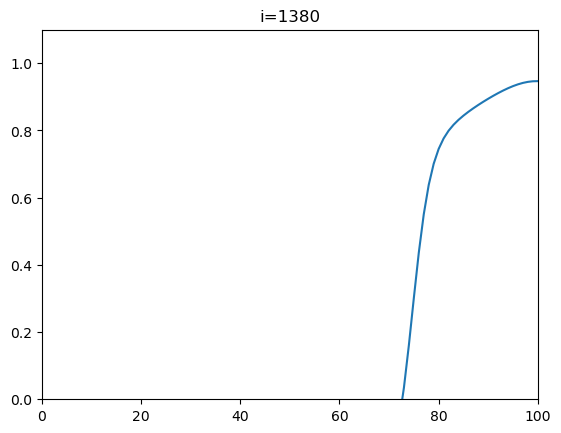

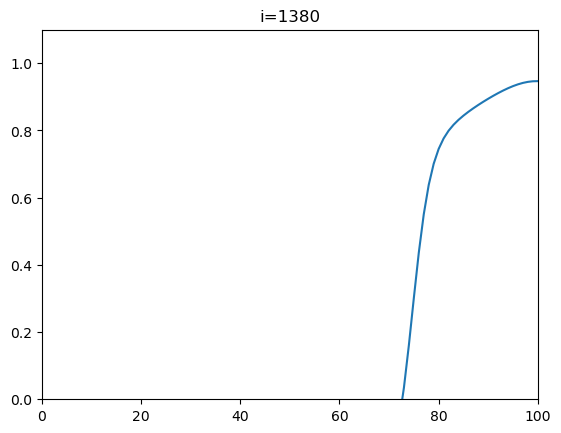

In [31]:
k = 2.0
A = 1.0
alpha = 0.1
L = 100
eps = 0.005
gamma = 2.0

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N+1)
w = np.zeros(N+1)
left =  int(N/10)
v[:left] = 0.3

#introduce the appropriate arrays for slicing:
I = np.arange(1,N)
Ip = I+1
Im = I-1

def g(v):
    return A*v*(1-v)*(v-alpha) - w

for i in range (1400):
    I_ion = g(v) 
    #first add diffusion terms:
    v[I] = v[I] + dt * (k / dx ** 2) * (v[Ip] - 2 * v[I] + v[Im])
    v[0] = v[0] + dt * (k / dx ** 2) * 2 * (v[1] - v[0]) 
    v[N] = v[N] + dt * (k / dx ** 2) * 2 * (v[N-1] - v[N])  
    
    #then the reaction:
    v = v + dt * I_ion
    w = w + dt * eps * (v - gamma * w)

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

### *Solution:*

Click below to see the solution.

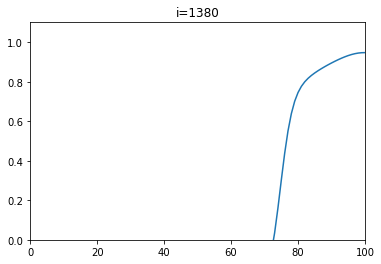

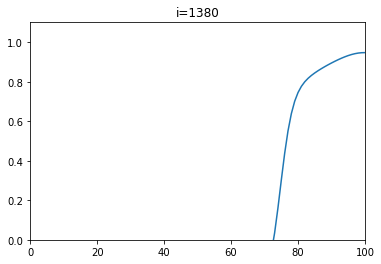

In [8]:
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

v = np.zeros(N+1)
w = np.zeros(N+1)
left = int(N/10)
v[:left] = 0.3
I = np.arange(1,N)
Ip = I+1
Im = I-1

for i in range(1400):
    I_ion = f(v) - w
    
    #first add the diffusion to v:
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v[0] = v[0] + dt * (k / dx ** 2) * 2 * (v[1] - v[0]) 
    v[N] = v[N] + dt * (k / dx ** 2) * 2 * (v[N-1] - v[N])  
    
    #then the reaction terms:
    v = v + dt * I_ion;
    w = w + dt * eps * (v - gamma * w)

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())


### *Exercise 4: Periodic boundary conditions*

We can model a simple reentrant circuit with periodic boundary
conditions:

$$
v(0) = v(L)
$$

This condition effectively creates a ring, by connecting the two ends of our cable to eachother. 

* Implement this condition in the FHN solver. You can either modify the code above directly or copy the cell here   and then modify.

* What happens? Why?

### *Solution:*
Click below to see the solution.

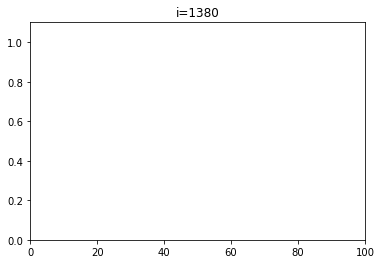

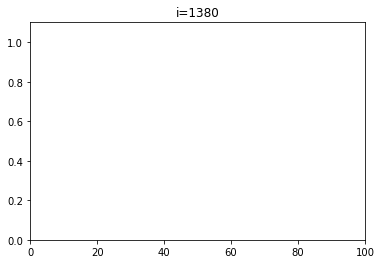

In [14]:
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

v = np.zeros(N+1)
w = np.zeros(N+1)

#mid = int(N/2)
#v[mid-10:mid+10] = 0.3
#w[:int(0.9*mid)] = 0.1

#left = int(N/10)
#v[:left] = 0.3
mid =  int(N/2);
v[mid-10:mid+10] = 0.3;
#w[:int(0.9*mid)] = 0.1

I = np.arange(N+1)
Ip = I+1
Ip[N] = 0
Im = I-1;
Im[0] = N

for i in range (1400):
    I_ion = A*v*(1-v)*(v-alpha) - w
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;
    w = w + dt*eps*(v-gamma*w)

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

### *Exercise 5: Simulating reentry*

Now, modify the initial condition in the code above to:

In [10]:
mid = int(N/2)
v[mid-2:mid+2] = 0.3

What happens?

Finally, add the line

In [11]:
w[:int(0.9*mid)] = 1

What happens? Why?

### *Solution:*

Click below to see the solution.

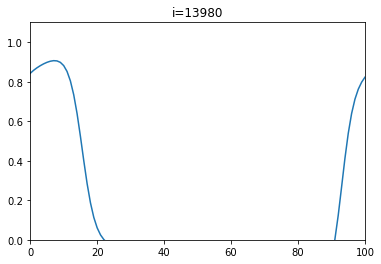

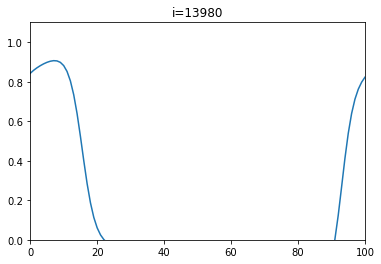

In [17]:
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

v = np.zeros(N+1)
w = np.zeros(N+1)

mid =  int(N/2);
v[mid-10:mid+10] = 0.3;
w[:int(0.9*mid)] = 0.1

I = np.arange(N+1)
Ip = I+1
Ip[N] = 0
Im = I-1;
Im[0] = N

for i in range (14000):
    I_ion = A*v*(1-v)*(v-alpha) -w
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;
    w = w + dt*eps*(v-gamma*w)

    #v[0] = v[1]
    #v[N-1] = v[N-2]

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())